<a href="https://colab.research.google.com/github/daringsingh22/Titanic_Survivors-Prediction/blob/master/Titanic_Survivors_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survivors Prediction

Binary Classification using Logistic Regression

Logistic regression is inherently designed for binary classification tasks, where the goal is to predict one of two possible outcomes. In the Titanic survivors prediction problem, the target variable (Survived) has two possible values: 0 (did not survive) or 1 (survived). <br><br>Logistic regression models the probability that a given input belongs to one of these two classes, making it an ideal choice for this problem.

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from scipy.stats import zscore
import pickle

## Load Dataset

In [ ]:
titanic_df = pd.read_csv("Titanic.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Data Dictionary

![DataDictionary](DataDictionary.png)

![VariableNotes](VariableNotes.png)

## Data Exploration and Preprocessing

In [ ]:
# Provides a concise summary of the DataFrame, including the number of non-null entries,
# column names, and data types.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Generates descriptive statistics (e.g., mean, median, min, max) for numeric columns in the
# DataFrame.
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Counts the number of missing (NaN) values in each column.
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

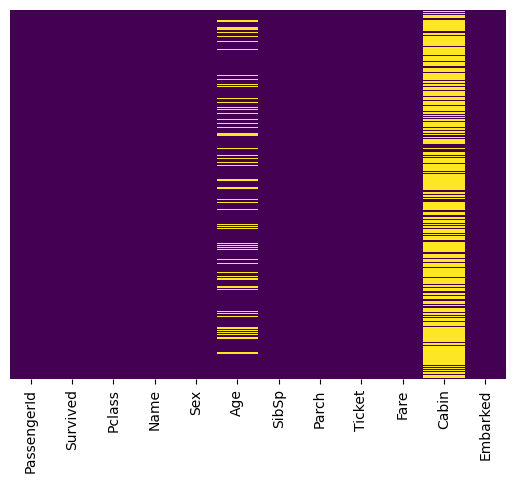

In [ ]:
# Visualizes the missing values using a heatmap to identify patterns or columns with many
# missing values.
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Visualizing Data Distribution

<Axes: xlabel='Survived', ylabel='count'>

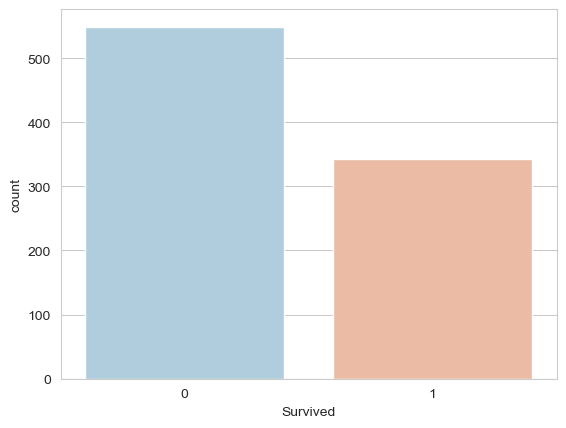

In [ ]:
# Displays the count of occurrences for each category (e.g., Survived, Sex, Pclass) in the dataset.
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

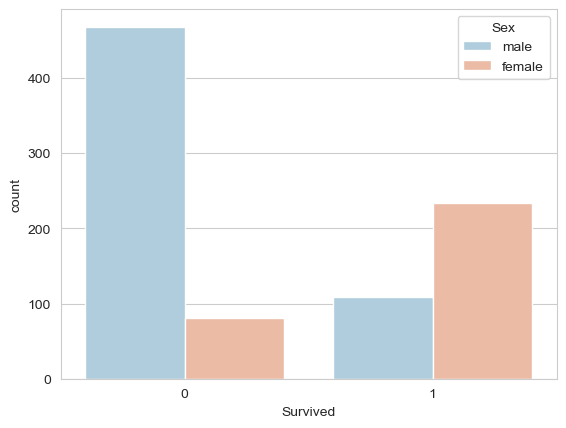

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic_df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

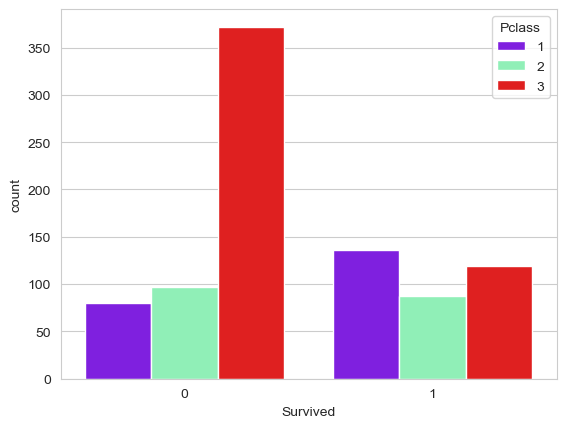

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_df,palette='rainbow')

<Axes: xlabel='Age'>

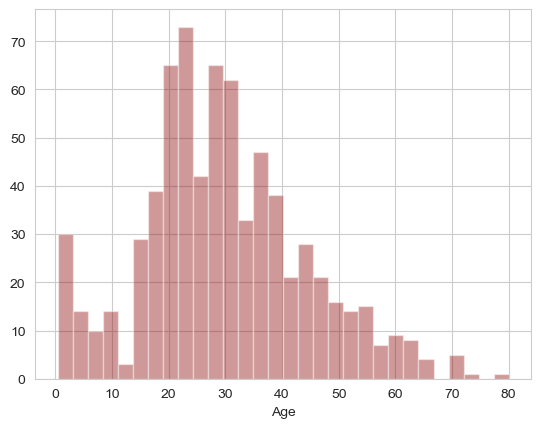

In [ ]:
# Plots a histogram of the 'Age' column to visualize its distribution, excluding missing values.
sns.distplot(titanic_df['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

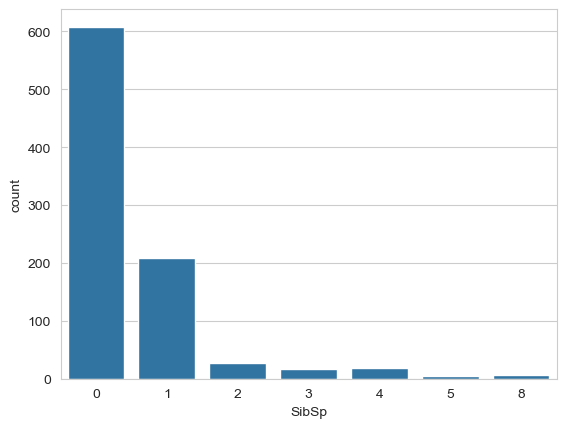

In [ ]:
sns.countplot(x='SibSp',data=titanic_df)

<Axes: >

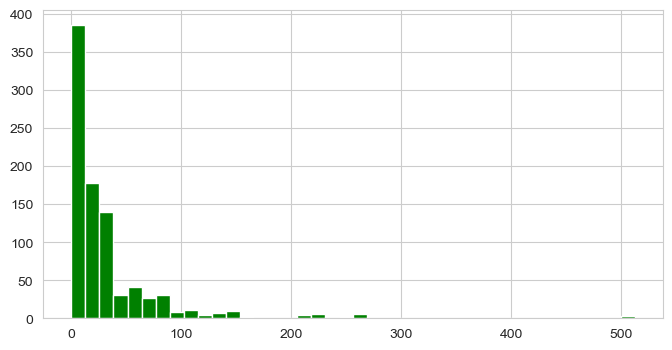

In [ ]:
# Plots a histogram of the 'Fare' column to visualize its distribution.
titanic_df['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Handle Missing Values

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). <br><br>However we can be smarter about this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

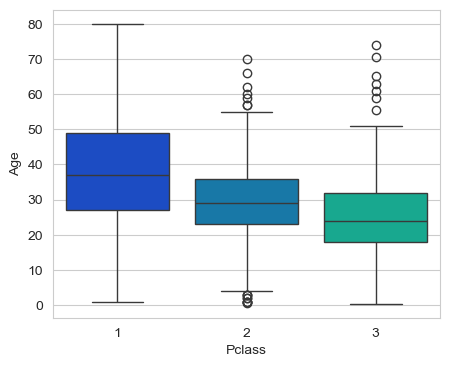

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='Pclass',y='Age',data=titanic_df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
# A function to fill in missing 'Age' values based on the passenger class ('Pclass').
# It assigns an average age depending on the class: 37 for 1st, 29 for 2nd, and 24 for 3rd class.
def impute_age(cols):
    Age, Pclass = cols
    if pd.isnull(Age):
        return {1: 37, 2: 29}.get(Pclass, 24)
    return Age

In [ ]:
# Applies the impute_age function row-wise across the DataFrame to fill missing 'Age' values.
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
# Drops the 'Cabin' column, which has too many missing values.
titanic_df.drop('Cabin',axis=1,inplace=True)

In [ ]:
# Removes rows with any remaining missing values.
titanic_df.dropna(inplace=True)

Now let's check that heat map again!

<Axes: >

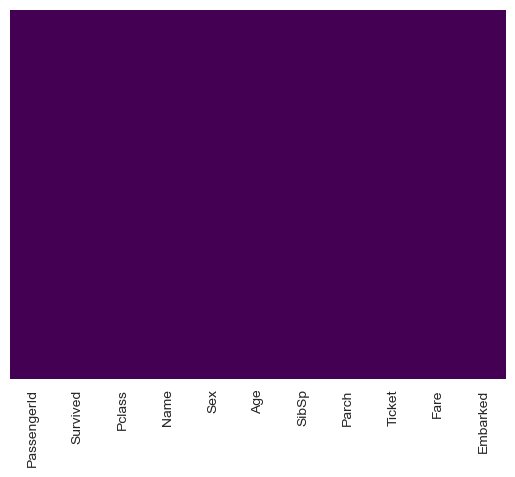

In [ ]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Removes any duplicate rows from the DataFrame to ensure that each entry is unique.
titanic_df.drop_duplicates(inplace=True)

### Identifying Outliers in Numerical Columns

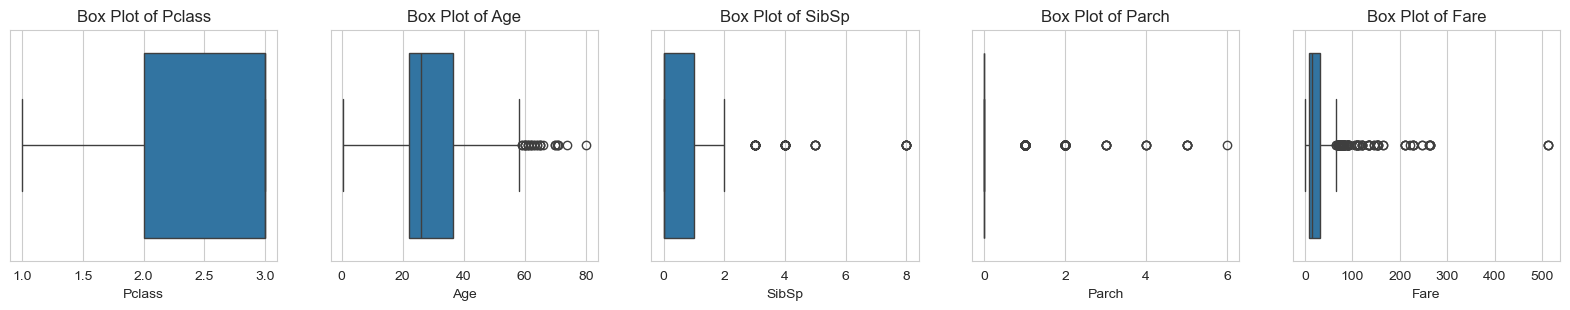

In [ ]:
# Plot box plots to identify outliers in numerical columns like 'Pclass', 'Age', 'SibSp',
# 'Parch', 'Fare'
plt.figure(figsize=(20, 3))

plt.subplot(1, 5, 1)
sns.boxplot(x=titanic_df['Pclass'])
plt.title('Box Plot of Pclass')

plt.subplot(1, 5, 2)
sns.boxplot(x=titanic_df['Age'])
plt.title('Box Plot of Age')

plt.subplot(1, 5, 3)
sns.boxplot(x=titanic_df['SibSp'])
plt.title('Box Plot of SibSp')

plt.subplot(1, 5, 4)
sns.boxplot(x=titanic_df['Parch'])
plt.title('Box Plot of Parch')

plt.subplot(1, 5, 5)
sns.boxplot(x=titanic_df['Fare'])
plt.title('Box Plot of Fare')

plt.show()

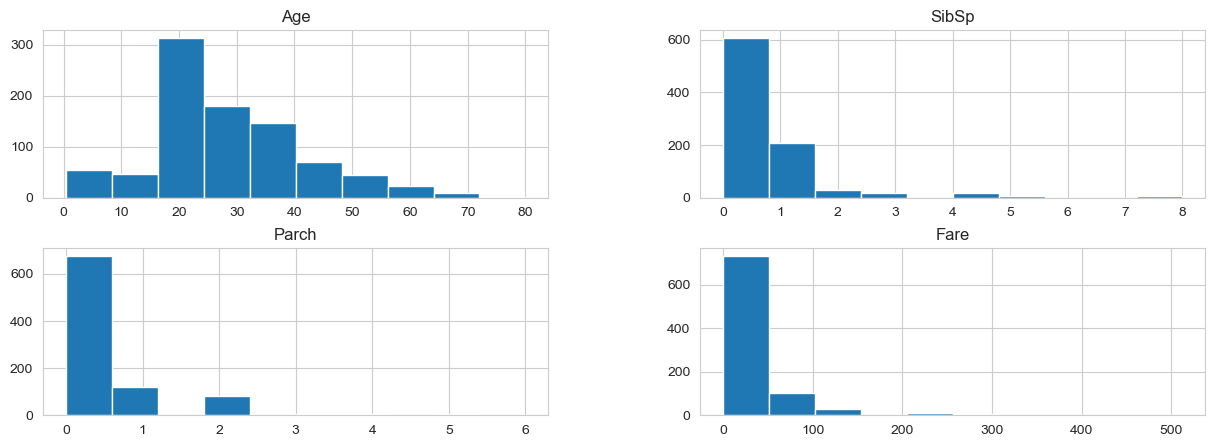

In [ ]:
# Plot histograms for numerical columns to visualize their distributions.
titanic_df[['Age', 'SibSp', 'Parch','Fare']].hist(figsize=(15, 5))
plt.show()

In [ ]:
# Use Z-scores to identify outliers
# Compute the Z-score for each value in the column, which indicates how many standard deviations
# a value is from the mean.
# Values with a Z-score greater than 3 or less than -3 are considered outliers.
titanic_df['Age_Zscore'] = zscore(titanic_df['Age'])
titanic_df['SibSp_Zscore'] = zscore(titanic_df['SibSp'])
titanic_df['Parch_Zscore'] = zscore(titanic_df['Parch'])
titanic_df['Fare_Zscore'] = zscore(titanic_df['Fare'])

# Filter out rows where the Z-score of any selected column indicates an outlier.
titanic_df = titanic_df[(titanic_df['Age_Zscore'].abs() <= 3) &
                    (titanic_df['SibSp_Zscore'].abs() <= 3) &
                    (titanic_df['Parch_Zscore'].abs() <= 3) &
                    (titanic_df['Fare_Zscore'].abs() <= 3)]

# Remove the temporary Z-score columns after filtering out the outliers.
titanic_df = titanic_df.drop(columns=['Age_Zscore', 'SibSp_Zscore', 'Parch_Zscore', 'Fare_Zscore'])

### Exploring Categorical Columns

In [ ]:
# Check unique values for categorical column
print("Unique values in 'Embarked':\n", titanic_df['Embarked'].unique())
print("\nUnique values in 'Sex':\n", titanic_df['Sex'].unique())

Unique values in 'Embarked':
 ['S' 'C' 'Q']

Unique values in 'Sex':
 ['male' 'female']


In [ ]:
# Display the frequency distribution for each categorical column
print(titanic_df['Sex'].value_counts())
print()
print(titanic_df['Embarked'].value_counts())
print()
print(titanic_df['Ticket'].value_counts())

Sex
male      539
female    279
Name: count, dtype: int64

Embarked
S    594
C    153
Q     71
Name: count, dtype: int64

Ticket
1601            7
S.O.C. 14879    5
113760          4
113781          4
LINE            4
               ..
19988           1
2693            1
PC 17612        1
349233          1
370376          1
Name: count, Length: 658, dtype: int64


### Feature Engineering

We'll need to convert categorical features to dummy variables using pandas one hot encoding! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
# Convert categorical columns like 'Embarked' into one-hot encoded binary columns, making them
# suitable for machine learning algorithms.
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], prefix='Embarked')

In [ ]:
# Initialize encoder
le = LabelEncoder()

# Encode categorical columns (like 'Sex', 'Embarked') into numerical values (0, 1).
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])

# Encode the 'Embarked_[...]' columns
titanic_df['Embarked_C'] = le.fit_transform(titanic_df['Embarked_C'])
titanic_df['Embarked_S'] = le.fit_transform(titanic_df['Embarked_S'])
titanic_df['Embarked_Q'] = le.fit_transform(titanic_df['Embarked_Q'])

In [ ]:
# Drops non-essential columns like 'Name' and 'Ticket' which don't contribute to the model.
titanic_df.drop(['Name','Ticket'],axis=1,inplace=True)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


## Finding Correlation

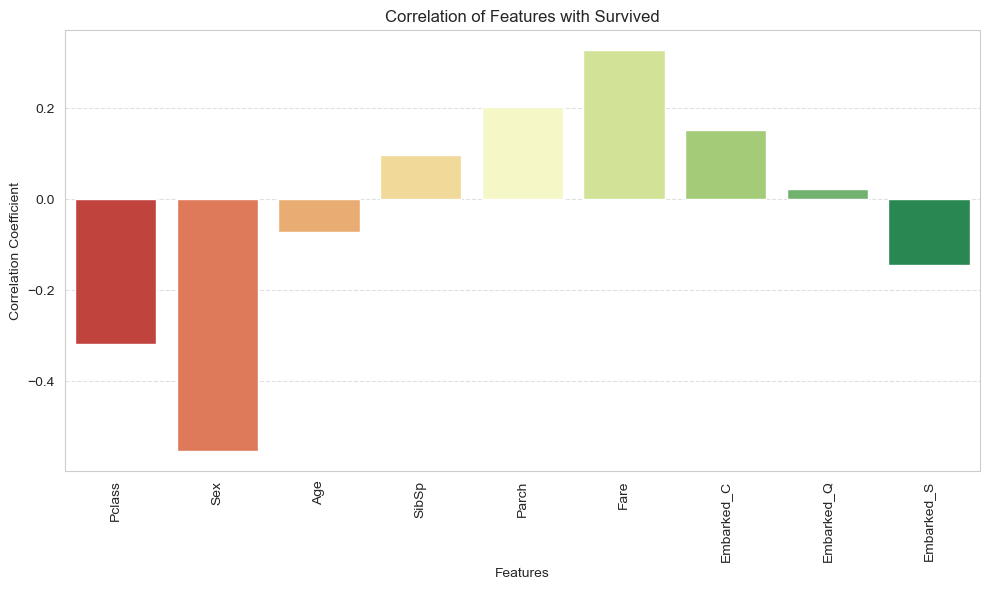

In [ ]:
# Compute the correlation matrix for all numerical features with respect to the target variable
# 'Survived'.
correlation_with_survived = titanic_df.drop(columns=['PassengerId']).corr()['Survived'
].drop('Survived')

# Visualize the correlation of each feature with 'Survived', helping to identify features with
# strong correlations.
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_survived.index, y=correlation_with_survived.values, palette='RdYlGn')
plt.xticks(rotation=90)
plt.title('Correlation of Features with Survived')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Drop columns with low correlation with the target variable
titanic_df = titanic_df[['Pclass','Sex','Parch','Fare','Embarked_C','Embarked_S','Survived']]
titanic_df.head()

,Pclass,Sex,Parch,Fare,Embarked_C,Embarked_S,Survived
0,3,1,0,7.2500,0,1,0
1,1,0,0,71.2833,1,0,1
2,3,0,0,7.9250,0,1,1
3,1,0,0,53.1000,0,1,1
4,3,1,0,8.0500,0,1,0


## Model Building

In [ ]:
# Prepare features and target variable
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializes a logistic regression model, which is a linear model used for binary classification.
model = LogisticRegression()

# Trains the logistic regression model on the training data.
model.fit(X_train,y_train)

LogisticRegression()

## Model Prediction

In [ ]:
# Uses the trained model to predict the survival of passengers in the test set.
y_pred = model.predict(X_test)

In [ ]:
# Adding predictions column to test set
test_set_with_predictions = pd.DataFrame(X_test, columns=X.columns)
test_set_with_predictions['Actual_Survival'] = y_test.values
test_set_with_predictions['Predicted_Survival'] = y_pred
test_set_with_predictions.reset_index(drop=True, inplace=True)
test_set_with_predictions.head(10)

,Pclass,Sex,Parch,Fare,Embarked_C,Embarked_S,Actual_Survival,Predicted_Survival
0,2,0,1,23.0000,0,1,1,1
1,3,1,0,7.7250,0,0,0,0
2,3,1,0,7.8958,0,1,0,0
3,1,0,0,106.4250,1,0,1,1
4,3,1,0,7.8958,0,1,0,0
5,3,1,0,14.5000,0,1,0,0
6,3,0,1,19.2583,1,0,1,1
7,3,1,0,7.8542,0,1,0,0
8,3,1,0,7.7500,0,0,0,0
9,2,0,1,30.0000,0,1,1,1


## Model Evaluation

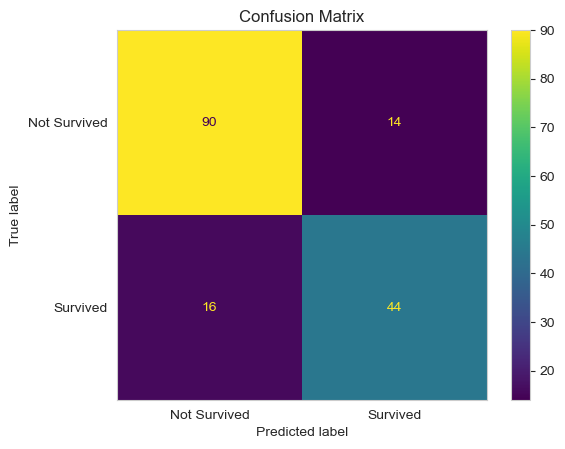

In [ ]:
# Display the confusion matrix, showing the true positives, false positives, true negatives, and false
# negatives.
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [ ]:
# Provides a detailed report of precision, recall, F1-score, and support for each class.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       104
           1       0.76      0.73      0.75        60

    accuracy                           0.82       164
   macro avg       0.80      0.80      0.80       164
weighted avg       0.82      0.82      0.82       164



In [ ]:
# Calculates the accuracy of the model, which is the ratio of correctly predicted instances to the
# total instances.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


## Cross-Validation

In [ ]:
# Performs cross-validation by splitting the training data into 5 parts and training the model on
# 4 parts while validating on the 5th.
# The process is repeated 5 times, and the mean accuracy is calculated to assess model stability.

accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print("Cross-validation accuracy mean:", accuracies.mean().round(2))

Cross-validation accuracy mean: 0.78


## Model Deployment

### Save the model

In [ ]:
# Save the model to a pickle file
with open('titanic_survivors_predictor.pkl', 'wb') as file:
    pickle.dump({'model': model}, file)

print("Model saved to 'titanic_survivors_predictor.pkl'")

Model saved to 'titanic_survivors_predictor.pkl'


### Load and Use the Model

In [ ]:
# Load the trained model from the pickle file
with open('titanic_survivors_predictor.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
    model = loaded_data['model']

# Function to take user input and prepare the data for prediction
def get_user_input():
    print("Please provide the following details to predict survival on the Titanic:")
    Pclass = int(input("Passenger Class (1, 2, 3): "))
    Sex = input("Sex (male/female): ").strip().lower()
    Parch = int(input("Number of Parents/Children aboard the Titanic: "))
    Fare = float(input("Passenger Fare: "))
    Embarked = input("Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton): "
                    ).strip().upper()

    # Convert categorical inputs to numerical values
    Sex = 1 if Sex == 'male' else 0

    # One-hot encoding for 'Embarked'
    Embarked_C, Embarked_Q, Embarked_S = 0, 0, 0
    if Embarked == 'C':
        Embarked_C = 1
    elif Embarked == 'Q':
        Embarked_Q = 1
    elif Embarked == 'S':
        Embarked_S = 1

    # Prepare the input data in the order the model expects
    user_data = np.array([Pclass, Sex, Parch, Fare, Embarked_C, Embarked_S]).reshape(1, -1)
    return user_data

# Get user input
user_input = get_user_input()

# Make prediction
prediction = model.predict(user_input)

# Output the result
if prediction[0] == 1:
    print("\nPrediction: Survived")
else:
    print("\nPrediction: Did not survive")

Please provide the following details to predict survival on the Titanic:


Passenger Class (1, 2, 3):  1
Sex (male/female):  female
Number of Parents/Children aboard the Titanic:  2
Passenger Fare:  39
Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton):  C



Prediction: Survived


In [ ]:
'''
# Sample input

Passenger Class (1, 2, 3):  3
Sex (male/female):  male
Number of Parents/Children aboard the Titanic:  0
Passenger Fare:  20
Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton):  S

# Sample output
Prediction: Did not survive
'''

'\n# Sample input\n\nPassenger Class (1, 2, 3):  3\nSex (male/female):  male\nNumber of Parents/Children aboard the Titanic:  0\nPassenger Fare:  20\nPort of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton):  S\n\n# Sample output\nPrediction: Did not survive\n'